# Import af pakker:
Importere standardpakker

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
from sklearn import linear_model
from IPython.core.display import HTML
from itertools import cycle, islice
#pd.options.display.max_rows = 100

# Disposition

- Indlæsning af CSV filer

- Arbejdsmarkedsanalyse_brancher
    - Spørgsmål 1: Er der nogle uventede korrelationer i datasættet?
    - Spørgsmål 2: Hvilke brancher er mest udsat for stress?
    - Spørgsmål 3: Hvilke faktorer kontribuerer mest til stress?
- Arbejdsmarkedsanalyse_køn_alder
    - Spørgsmål 4: Er der nogle interessante forskelle på mænd og kvinder?


# Indlæsning af CSV filer
Indlæsning af data i pandas i to forskellige dataframes:

In [2]:
df_brancher = pd.read_csv('data/arbejdsmarkedsanalyse_brancher.csv',delimiter=';',decimal=',',encoding = 'unicode_escape')
df_koen_alder = pd.read_csv('data/arbejdsmarkedsanalyse_koen_alder.csv',delimiter=';',decimal=',',encoding = 'unicode_escape')

# Arbejdsmarkedsanalyse_brancher

In [3]:
# Får et overblik over datasættet:
with pd.option_context('display.max_colwidth', -1): 
    display(HTML(df_brancher.head(2).to_html()))

,Field Values Index,Ordforklaring,Akse,Farveskala,Field Values Index (Fixed),Navigation - Arbejdsmiljøprofiler,Score (Indekseret score) (gennemsnit),Score (Indekseret score) (gennemsnit) (label),Score (Total) (Fixed),Gennemsnit,Score (Indekseret score),Score (Total),Antpct,Antpers,Group,Hoej Score Godt,Kategori10,Kategori11,Kategori12,Kategori13,Kategori14,Kategori15,Kategori1,Kategori2,Kategori3,Kategori4,Kategori5,Kategori6,Kategori7,Kategori8,Kategori9,Main Group,Score,Field Values,Mean,Question Label,Sluttekst,Spm Formulering,Topic Label,Type,Year
0,49.824544,"Spørgsmål: Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?\n\n- 1. Altid\n- 2. Ofte\n- 3. Sommetider\n- 4. Sjældent\n- 5. Aldrig\n\nI resultaterne præsenteres den gennemsnitlige score (1-5).",Score,-5.059771,54.884315,Arbejdsmiljøprofiler,52.180881,2.609044,-2.609044,NaN,53.173963,NaN,NaN,224,Bibliotekarer og beskæftigede med kultur,0,NaN,NaN,NaN,NaN,NaN,NaN,1. Altid,2. Ofte,3. Sommetider,4. Sjældent,5. Aldrig,NaN,NaN,NaN,NaN,Job,2.658698,-2.658698,2.658698,Ikke nok tid til arbejdsopgaver,I resultaterne præsenteres den gennemsnitlige score (1-5).,"Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?",Kvantitative krav og grænseløshed,kont,2018
1,59.245851,"Spørgsmål: Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?\n\n- 1. Altid\n- 2. Ofte\n- 3. Sommetider\n- 4. Sjældent\n- 5. Aldrig\n\nI resultaterne præsenteres den gennemsnitlige score (1-5).",Score,4.361536,54.884315,Arbejdsmiljøprofiler,52.180881,2.609044,-2.609044,NaN,51.324841,NaN,NaN,388,Bogholdere,0,NaN,NaN,NaN,NaN,NaN,NaN,1. Altid,2. Ofte,3. Sommetider,4. Sjældent,5. Aldrig,NaN,NaN,NaN,NaN,Job,2.566242,-2.566242,2.566242,Ikke nok tid til arbejdsopgaver,I resultaterne præsenteres den gennemsnitlige score (1-5).,"Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?",Kvantitative krav og grænseløshed,kont,2018


In [4]:
# Overskydende/irrelevante informationer bliver sorteret fra.
df_brancher = df_brancher[['Group','Topic Label','Spm Formulering','Score (Indekseret score)']]
# Følgende kolonneoverskrifter beholdes:
# - Group:                    Branche de adspurgte personer arbejder i
# - Topic Label:              Overordnet Kategori
# - Spm Formulering:          Spørgsmållet der bliver stillet
# - Score (Indekseret score): Den indekseret score bruges istedet for "score" eftersom den er skaleret for 
# all spørgsmål fra 1 - 100 istedet for forskellige skalaer.

# Tabellen printes og undersøges igen
with pd.option_context('display.max_colwidth', -1): 
    display(HTML(df_brancher.head(5).to_html()))

,Group,Topic Label,Spm Formulering,Score (Indekseret score)
0,Bibliotekarer og beskæftigede med kultur,Kvantitative krav og grænseløshed,"Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?",53.173963
1,Bogholdere,Kvantitative krav og grænseløshed,"Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?",51.324841
2,"Brandmænd, reddere og sikkerhedsvagter",Kvantitative krav og grænseløshed,"Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?",45.297700
3,Bude og kurerer,Kvantitative krav og grænseløshed,"Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?",54.245458
4,"Bus- og taxachauffører, lokoførere m.fl.",Kvantitative krav og grænseløshed,"Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?",46.182196


## Spørgsmål 1: Er der nogle uventede korrelationer i datasættet?

In [5]:
# For at undersøge dette spørgsmål laves der først en korrelationsmatrice. Dette kræver dog at formattet på df
# er anderledes. Topic Label bliver transformeret til kolonneoverskrifter via pivottable.
df_brancher_Q=pd.pivot_table(df_brancher,values = 'Score (Indekseret score)',index='Group',columns=['Topic Label'],aggfunc=np.mean)
# Herved får hver Topic Label nu en værdi der svarer til gennemsnittet af alle spørgsmål under denne. Spørgsmålene
# vægtes således ens selvom dette måske ikke er tilfældet.

# Erstatter eventuelle NaN med gennemsnittet fra kolonnerne.
df_brancher_Q=df_brancher_Q.apply(lambda x: x.fillna(x.mean())) 
df_brancher_Q

Topic Label,Angstsymptomer,Arbejdsevne,Arbejdspladsens prioritering af arbejdsmiljø,Arbejdsrelateret sygdom,Arbejdstid,Belastende arbejdsstillinger,Depressive symptomer,Egen indsats for arbejdsmiljø,Engagement og mening i arbejdet,Fysisk hårdt arbejde,...,Rummelighed,Sikkerhed på arbejdspladsen,Smerter,Støj og vibrationer,"Støv, dampe og gasser",Sundhedsfremmetilbud,Træthed og søvnproblemer,Ulykker,Uoverskuelighed og stress,Vold og trusler
Group,,,,,,,,,,,,,,,,,,,,,
Bibliotekarer og beskæftigede med kultur,25.272768,80.039851,58.160649,9.806488,22.632052,16.140539,19.652666,72.197565,77.982726,30.455347,...,77.260429,61.983558,16.798486,17.287253,5.373243,27.467566,59.238291,2.799644,45.546937,7.217972
Bogholdere,24.809244,83.738559,58.162677,7.952596,13.669015,9.494745,17.350265,71.133733,74.997635,8.439244,...,76.775803,63.093093,15.856280,22.831446,0.493945,33.719061,56.239793,1.937773,44.133488,0.875693
"Brandmænd, reddere og sikkerhedsvagter",22.920222,81.601860,55.605183,13.703069,47.500416,20.522292,18.012636,71.896520,73.301220,42.055431,...,70.211281,60.744274,19.578612,31.002220,10.542638,33.354969,59.419002,9.976595,43.443058,11.592135
Bude og kurerer,27.903054,75.547289,53.506752,15.651772,27.833199,41.926189,21.859290,65.798177,65.945151,59.140133,...,68.057705,56.846829,22.108987,21.636007,12.337410,15.866094,60.196476,16.395660,45.652838,3.297285
"Bus- og taxachauffører, lokoførere m.fl.",21.799721,75.181782,53.032253,11.469513,41.973949,27.582103,17.001946,71.826415,69.984779,35.695838,...,71.047460,57.403564,17.421981,32.579779,14.460768,27.385715,56.021149,7.750240,43.682131,12.822090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Total,23.925724,79.533861,57.160146,10.729088,21.086542,23.015003,17.950678,72.716735,75.184772,33.144525,...,76.313959,61.358851,18.823226,23.926206,9.744464,22.430068,57.883301,7.335411,44.692339,7.078999
Tømrere og snedkere,16.612579,76.240650,53.053690,14.882435,14.232500,63.479096,13.275974,72.860665,73.973889,66.664462,...,72.768200,56.281421,25.950630,48.439364,44.812825,15.628795,55.881602,15.856244,41.812209,2.629706
Undervisere og forskere ved universiteter,26.649738,83.340609,58.860182,8.430850,16.517302,6.114818,19.039846,72.268137,80.629154,11.762928,...,75.272042,63.961692,13.091980,13.585872,2.590092,16.851570,58.369268,2.611996,46.863831,1.910367


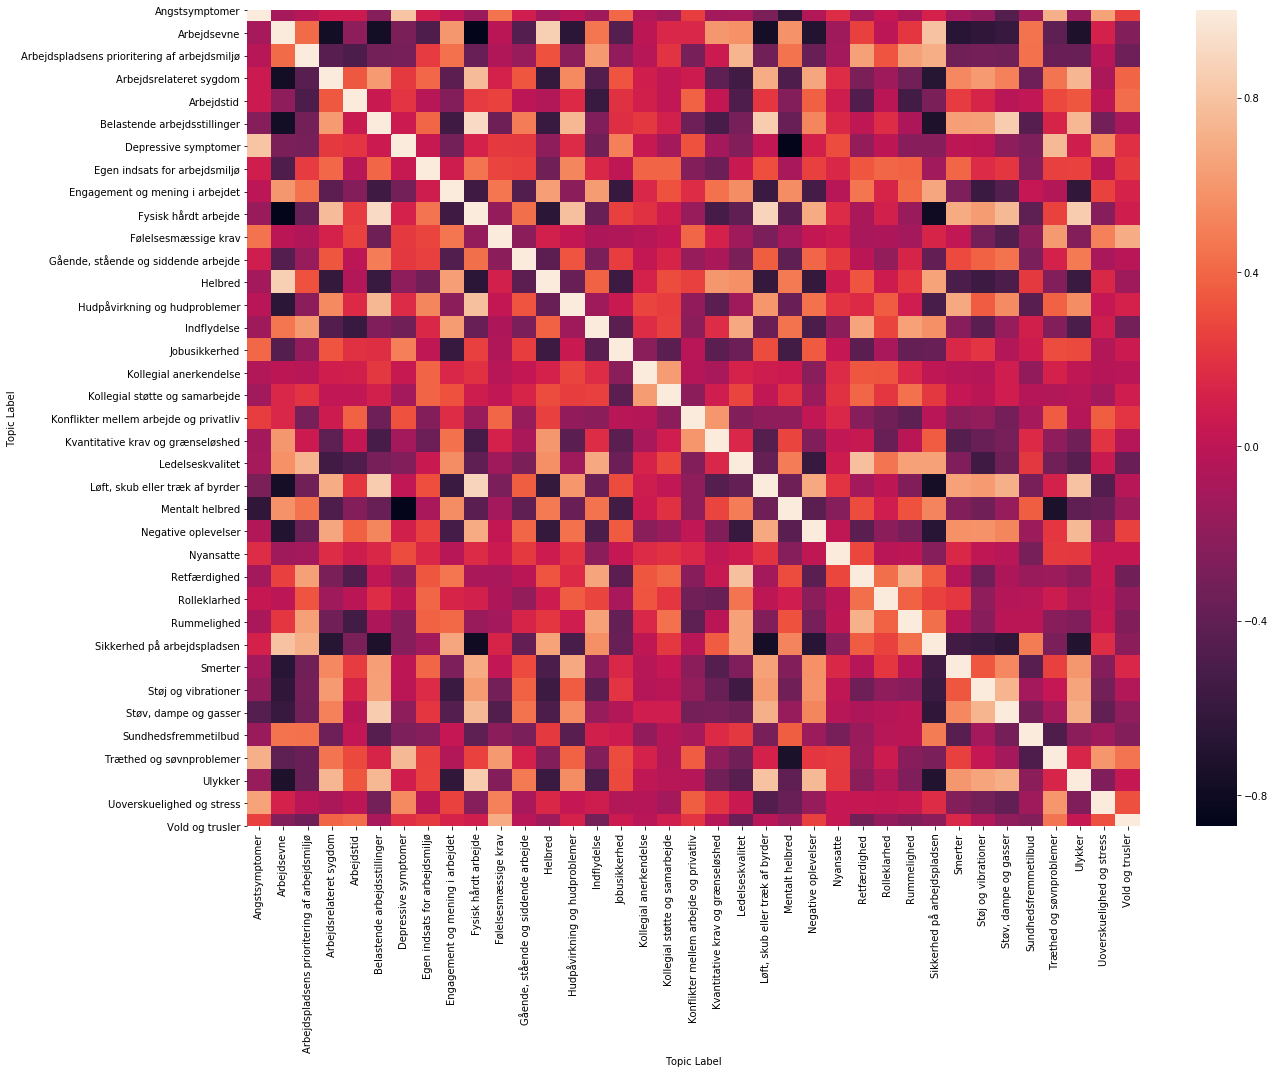

In [6]:
#Der laves en korrelationsanalyse på datasættet for at undersøge sammenhænge:
corr_branches = df_brancher_Q.corr()
# Heatmap
fig, ax = plt.subplots(figsize=(20,15)) # Sample figsize in inches
sns.heatmap(corr_branches, annot=False,yticklabels=True,xticklabels=True)

In [7]:
# Ovenstående heatmap er meget uoverskuelig så derfor printes der istedet de hhv. mest og mindst korrelerede labels:
corr_branches_list = (corr_branches.where(np.triu(np.ones(corr_branches.shape), k=1).astype(np.bool))
                      .stack().sort_values(ascending=False))
                 
print('Mest positiv korreleret:')
print(corr_branches_list[0:9])
print('\nMest negativ korreleret:')
print(corr_branches_list[-10:-1])

Mest positiv korreleret:
Topic Label                      Topic Label                    
Belastende arbejdsstillinger     Fysisk hårdt arbejde               0.915148
Fysisk hårdt arbejde             Løft, skub eller træk af byrder    0.888568
Arbejdsevne                      Helbred                            0.855017
Fysisk hårdt arbejde             Ulykker                            0.840965
Belastende arbejdsstillinger     Støv, dampe og gasser              0.839887
                                 Løft, skub eller træk af byrder    0.839882
Angstsymptomer                   Depressive symptomer               0.808885
Løft, skub eller træk af byrder  Ulykker                            0.801546
Arbejdsevne                      Sikkerhed på arbejdspladsen        0.798535
dtype: float64

Mest negativ korreleret:
Topic Label                      Topic Label                    
Belastende arbejdsstillinger     Sikkerhed på arbejdspladsen       -0.726061
Arbejdsevne                      U

Her ses altså ingen overraskende korrelationer der kunne være interesante at undersøge.

## Spørgsmål 2: Hvilke brancher er mest udsat for stress?

In [8]:
# Der kigges på spørgsmål under kategorien "Uoverskuelighed og stress":
df_stress = df_brancher[(df_brancher["Topic Label"]=="Uoverskuelighed og stress")]
df_stress_Q = pd.pivot_table(df_stress,values = 'Score (Indekseret score)',index='Group',
                             columns=['Spm Formulering'],aggfunc=np.mean).reset_index()

# Vi er interesseret i dem der har følt sig stressede pga. job og derfor sorterer vi denne kategori
df_stress_Q.sort_values(by='Hvor ofte har du følt dig stresset pga. dit arbejde i de seneste to uger?',ascending=False)

Spm Formulering,Group,Den samlede score for uoverskuelighed inden for den seneste måned.,Hvor ofte har du følt dig stresset i de seneste to uger?,Hvor ofte har du følt dig stresset pga. dit arbejde i de seneste to uger?
33,Læger,26.309258,31.566752,76.797003
63,Socialrådgivere,29.139723,31.930280,73.722229
16,Gymnasielærere,26.141348,31.519134,73.590295
73,Undervisere og forskere ved universiteter,26.554108,29.124641,73.401598
65,Specialundervisere,24.866446,27.636657,70.327617
...,...,...,...,...
20,Jord- og betonarbejdere,23.419080,19.024406,50.390603
49,Præcisionshåndværkere,25.762712,21.247393,49.882419
2,"Brandmænd, reddere og sikkerhedsvagter",24.683971,20.237258,49.046700
15,Gartnere og landmænd,25.134643,25.141459,47.367466


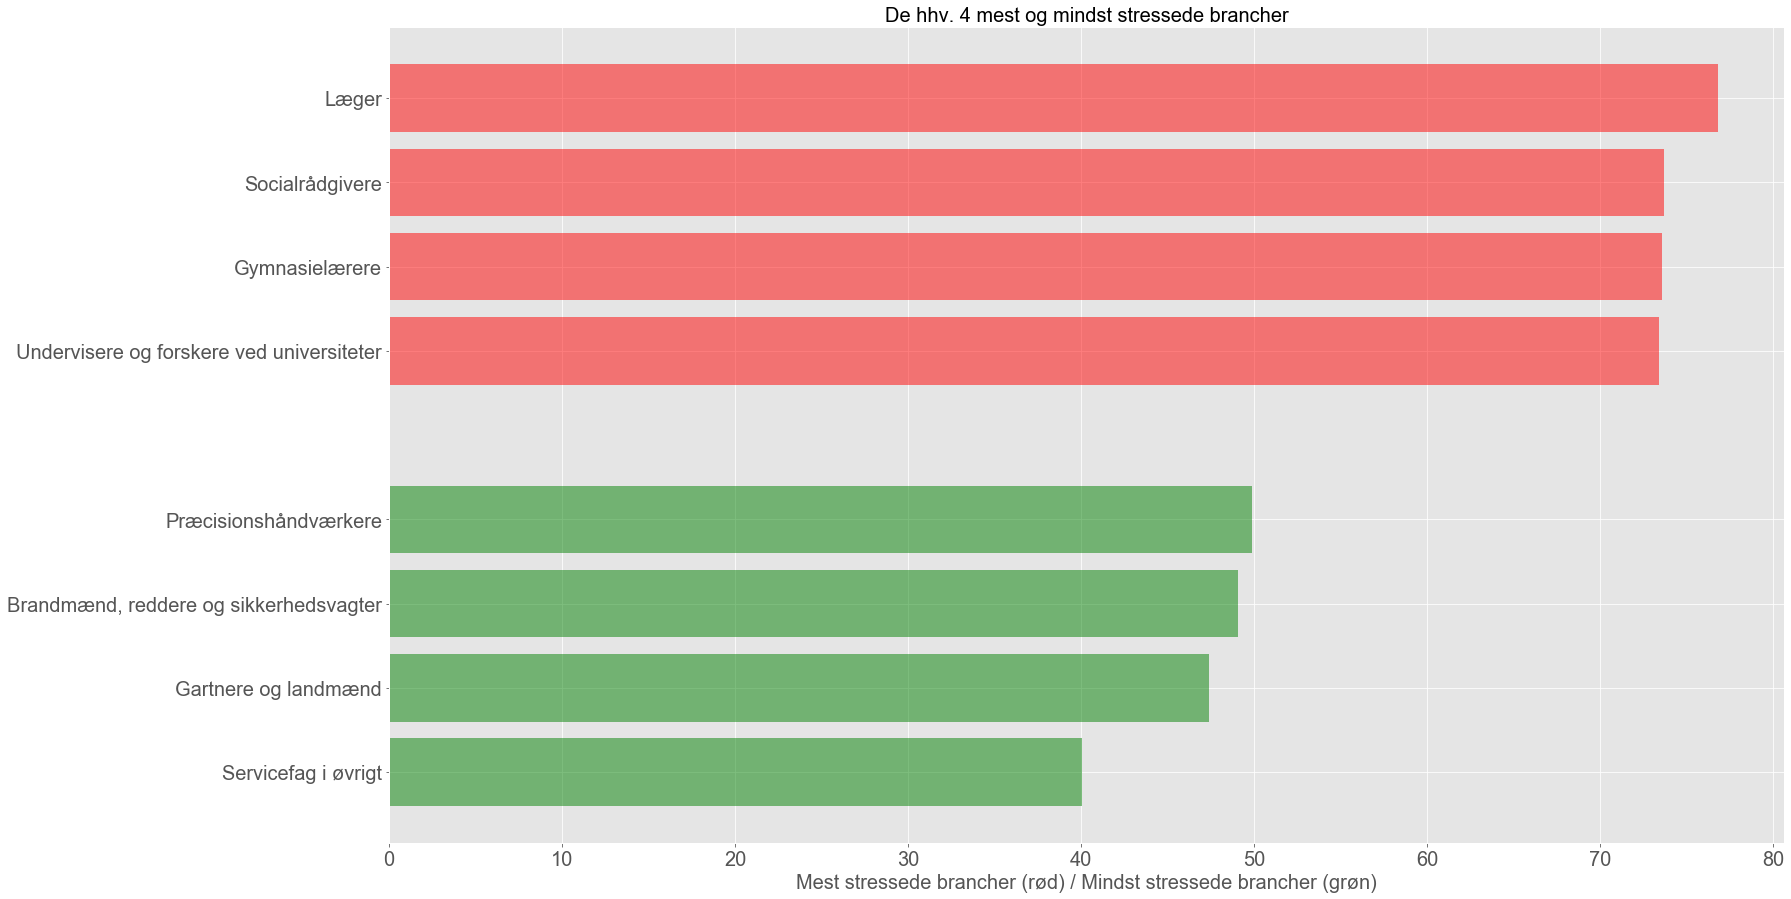

In [9]:
# Definerer en plot function
def plot_maxmin_bar(df,target,target_value):
    '''Plotter et barplot med de 4 max og 4 min værdier'''
    plt.style.use('ggplot')
    sorted_df = df.sort_values(by=[target_value])
    plot_max = sorted_df.iloc[-4:]
    plot_min = sorted_df.iloc[0:4]
    plot_all = pd.concat([plot_min, plot_max])
    
    my_colors = list(islice(cycle(['g', 'g', 'g', 'g', 'r', 'r', 'r', 'r']), None, len(plot_all)))
    plt.figure(figsize=(25,15))
    axis_font = {'fontname':'Arial', 'size':'20'}
    plt.barh([0,1,2,3,5,6,7,8], plot_all[target_value], align='center', alpha=0.5, color=my_colors)
    plt.yticks([0,1,2,3,5,6,7,8], plot_all[target], **axis_font)
    plt.xticks(**axis_font)
    return

# Bruger funktionen

plot_maxmin_bar(df_stress_Q,'Group','Hvor ofte har du følt dig stresset pga. dit arbejde i de seneste to uger?')

axis_font = {'fontname':'Arial', 'size':'20'}
plt.xlabel('Mest stressede brancher (rød) / Mindst stressede brancher (grøn)', **axis_font)
plt.title('De hhv. 4 mest og mindst stressede brancher', **axis_font)
plt.show()

Så hvorfor er f.eks. "læger"  mere stressede end "servicefag i øvrigt"? Vi kan undersøge hvilke spørgsmål de svarer mest forskelligt på. Måske dette kan give et svar.

In [10]:
# Laver 2 df for henholdhvis "læger" og "servicefag i øvrigt"
df_læger = pd.pivot_table(df_brancher.query('Group == "Læger"'),values = 'Score (Indekseret score)',index='Group',
                          columns=['Spm Formulering'],fill_value=None)
df_servicefag = pd.pivot_table(df_brancher.query('Group == "Servicefag i øvrigt"'),values = 'Score (Indekseret score)',index='Group',
                               columns=['Spm Formulering'],fill_value=None)
# Sætter dem sammen
df_minmaxstress = df_servicefag.append(df_læger,sort=False)

# Kigger på forskellen i indikseret score for alle spørgsmål:
df_minmaxstress.loc['Absolute Diff'] =  np.abs(df_minmaxstress.loc['Servicefag i øvrigt'] - df_minmaxstress.loc['Læger'])
df_minmaxstress = df_minmaxstress.sort_values(by='Absolute Diff', axis=1,ascending=False)
df_minmaxstress = df_minmaxstress.replace(0, pd.np.nan).dropna(axis=1, how='any')
df_minmaxstress.transpose()

Group,Servicefag i øvrigt,Læger,Absolute Diff
Hvor stor en del af din arbejdstid bærer eller løfter du?,49.726270,1.565066,48.161204
Hvor ofte har du følt dig stresset pga. dit arbejde i de seneste to uger?,40.064308,76.797003,36.732694
"Hvor stor en del af din arbejdstid gør du de samme armbevægelser mange gange i minuttet (fx pakkearbejde, montering, maskinfødning, udskæring)?",43.177692,10.617028,32.560663
Hvor stor en del af din arbejdstid skubber eller trækker du?,33.308914,2.325257,30.983657
"Hvor ofte skal du tage stilling til fx klienters, patienters eller elevers problemer i dit arbejde (ikke dine kollegers problemer)?",54.616071,83.984050,29.367979
...,...,...,...
Hvor ofte tages der hensyn til medarbejdere med færre kræfter (fx ældre eller syge) på din arbejdsplads?,72.870477,73.193979,0.323502
Hvor ofte tager din nærmeste leder sig tid til at engagere sig i din faglige udvikling?,64.706064,64.935921,0.229857
"I hvilken grad bliver medarbejderne på din arbejdsplads involveret i beslutninger, som påvirker jeres arbejdsmiljø?",56.265470,56.140411,0.125059
Den samlede score for ledelseskvalitet,68.502803,68.390251,0.112552


Der er nogle store forskelle på de 2 grupper, men umiddelbart ikke dem vi er ude efter. Vi benytter derfor en anden fremgangsmåde til at finde svaret på hvad der giver stress:

## Spørgsmål 3: Hvilke faktorer kontribuerer mest til stress?

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

# Initializere df_brancher_Q igen:
df_brancher_Q = pd.pivot_table(df_brancher,values = 'Score (Indekseret score)',index='Group',columns=['Spm Formulering'])
df_brancher_Q = df_brancher_Q.apply(lambda x: x.fillna(x.mean())) 


# y-værdien vi prøver at prædiktere: den indekserede score
# spørgsmålet: "Hvor ofte har du følt dig stresset pga. dit arbejde i de seneste to uger?"
y = df_brancher_Q['Hvor ofte har du følt dig stresset pga. dit arbejde i de seneste to uger?'].values

# Vi fjerne alle spørgsmål der har med stress at gøre:
df_brancher_Q=df_brancher_Q.drop(columns=['Hvor ofte har du følt dig stresset pga. dit arbejde i de seneste to uger?',
                'Hvor ofte har du følt dig stresset i de seneste to uger?',
                'Den samlede score for uoverskuelighed inden for den seneste måned.'])
X = df_brancher_Q.values

# Linear regression med cross validation:
lr = LinearRegression() 
scores = cross_validate(lr, X, y, cv=10,return_estimator=True,scoring=('r2', 'neg_mean_squared_error')) # Make crossvalidation

# Udregner den gennemsnitlige accuracy
linear_weights=0
for model in scores['estimator']:
    linear_weights = linear_weights + model.coef_
linear_weights=linear_weights/len(scores['estimator'])

# Printer scorer
print("MSE =", np.mean(scores['test_neg_mean_squared_error']))
print("R^2 =" ,np.mean(scores['test_r2']))

MSE = -39.43504166017161
R^2 = -1.2420563137765188


In [12]:
# MSE er meget høj (Den er negativ da cross_validate prøver at maksimere istedet for at minimere)
# R^2 er negativ og gennemsnittet beskriver altså vores data bedre end modellen gør.
# Altså er linear regression ikke vejen frem. Dette skyldes nok træningseksempler < features og multicollinearity
# Feature selection vil nok hjælpe her!
# Vi forsøger ar bruge Ridge regression istedet.
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Test og train split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1431)

# Leave one out cross validation:
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1,10,20,50,100,200,400,
                        800,1000,2000,4000,5000,6000,7000,8000],store_cv_values = True).fit(X_train, y_train)

# Der tjekkes at vi har fundet et minimum:
print('MSE for forskellige alphas = ',np.mean(ridge.cv_values_, axis=0))
print('Reguleringsparameter (alpha) der giver lavest MSE =',ridge.alpha_,'\n')

# Vi tjekker hvor god modellen er til at prædiktere:
y_pred = ridge.predict(X_test)
print('Prediction accuracy')
print("MSE  =", mean_squared_error(y_test, y_pred))
print("R^2  =" ,ridge.score(X_test,y_test))


MSE for forskellige alphas =  [39.76834814 39.7318651  39.3881737  37.22131352 32.43580621 30.55725812
 27.80101197 25.81732503 24.26483618 23.33036113 23.03342396 23.04401376
 23.22129615 23.40102848 23.45668098 23.51268012 23.57372231 23.64108039]
Reguleringsparameter (alpha) der giver lavest MSE = 800.0 

Prediction accuracy
MSE  = 17.47766062952489
R^2  = 0.696707619030053


 Vi kan altså se at vores model er i stand til at prædiktere nogenlunde. Den kunne dog sagtens optimeres.
Det skal dog også lige nævnes at test accuracy er bedre end trænings accuracy, hvilket nok skyldes det lave nummer af trænings- og testsæt. Her kunne man lave endnu et nested loop for at tjekke flere test scorer.

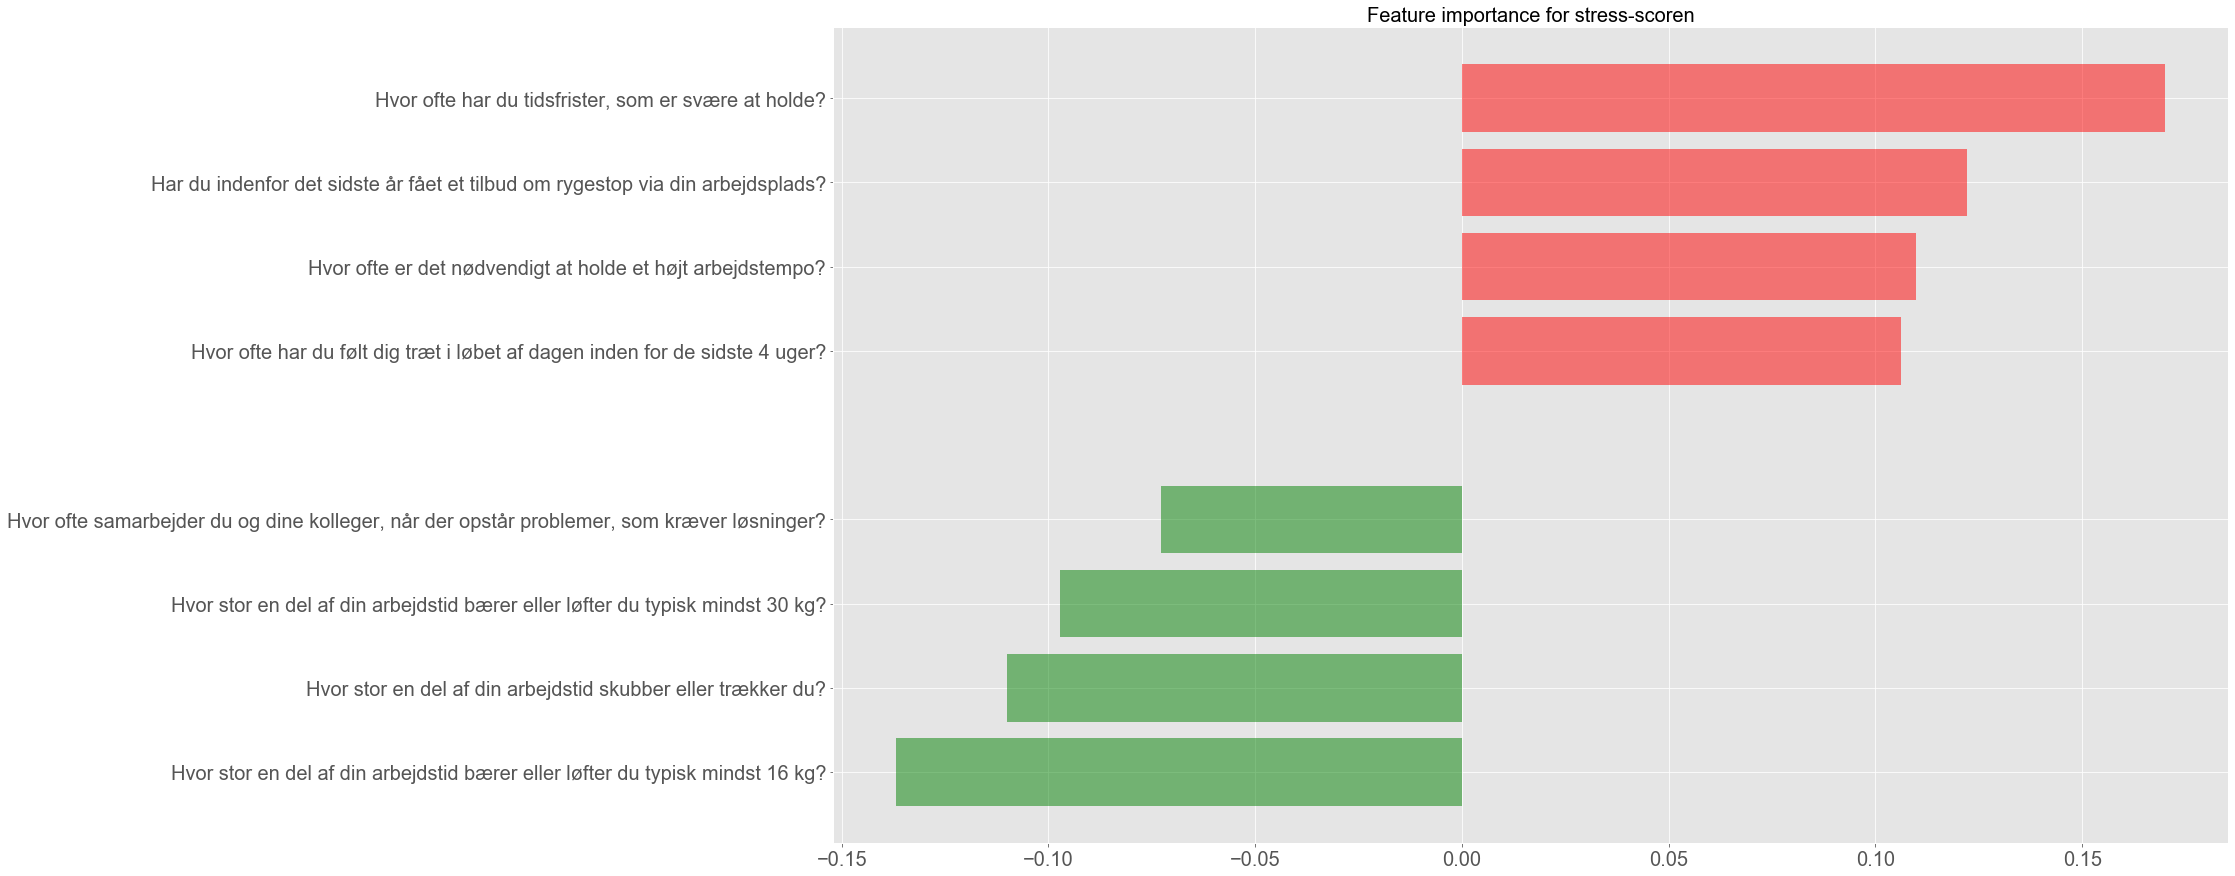

In [13]:
# Nu da vi har fået vægtene af den trænede model kan vi gå ind og se på vigtigheden af hver feature vha. disse vægte.
weights = pd.DataFrame(np.reshape(ridge.coef_,(1,-1)), columns=np.array(df_brancher_Q.columns))
weights_plot=weights.sort_values(by=0, axis=1,ascending=False).rename(index={0: 'Feature vægte (vigtigste først):'}).T

# Bruger plot funktionen
plot_maxmin_bar(weights_plot.reset_index(),'index','Feature vægte (vigtigste først):')
plt.style.use('ggplot')
axis_font = {'fontname':'Arial', 'size':'20'}
plt.title('Feature importance for stress-scoren', **axis_font)
plt.show()

# Arbejdsmarkedsanalyse_køn_alder

In [14]:
# Får et overblik over tabellen
with pd.option_context('display.max_colwidth', -1): 
    display(HTML(df_koen_alder.head(2).to_html()))

,Group,Question Label,Topic Label,Year,Akse,Ordforklaring,Antpers,Farveskala,Gennemsnit,Score (Indekseret score) (gennemsnit) (label),Score (Indekseret score) (gennemsnit),Score (Indekseret score),Score
0,"Mænd, 55 - 64 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget har du været generet af; A) at du pludselig bliver bange uden grund; B) nervøsitet eller indre uro; C) anfald af rædsel eller panik; D) at bekymre dig for meget?\n\n-Slet ikke\n-Lidt / Noget / En hel del / Særdeles meget\n\nI resultaterne præsenteres den samlede score for antal forskellige symptomer (0-4).",5080,38.852616,NaN,NaN,NaN,18.223967,0.911198
1,"Mænd, 45 - 54 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget har du været generet af; A) at du pludselig bliver bange uden grund; B) nervøsitet eller indre uro; C) anfald af rædsel eller panik; D) at bekymre dig for meget?\n\n-Slet ikke\n-Lidt / Noget / En hel del / Særdeles meget\n\nI resultaterne præsenteres den samlede score for antal forskellige symptomer (0-4).",5367,29.425529,NaN,NaN,NaN,19.637802,0.981890


In [15]:
# Overskydende/irrelevante informationer bliver fjernet.
df_koen_alder = df_koen_alder[['Group','Antpers','Question Label','Topic Label','Ordforklaring','Score (Indekseret score)']]
# Følgende Column overskrifter beholdes:
# - Group: Køn & Alder
# - Question Label: Overordnet Kategori
# - Ordforklaring: Spørgsmållet der er stillet
# - Score (Indekseret score): Den indekseret score bruges istedet for bare "score" eftersom den er skaleret for 
# all spørgsmål fra 1 - 100 istedet for forskellige skalaer.

# Deler "Group" op i "Køn" og "Alder" 
df_koen_alder['Køn'] = df_koen_alder['Group'].str.split(",").str[0]
df_koen_alder['Alder'] = df_koen_alder['Group'].str.split(", ").str[1]

# Tabellen printes og undersøges igen
with pd.option_context('display.max_colwidth', -1): 
    display(HTML(df_koen_alder.head(5).to_html()))

,Group,Antpers,Question Label,Topic Label,Ordforklaring,Score (Indekseret score),Køn,Alder
0,"Mænd, 55 - 64 år",5080,Symptomer på angst,Angstsymptomer,"Spørgsmål: I de sidste fire uger, hvor meget har du været generet af; A) at du pludselig bliver bange uden grund; B) nervøsitet eller indre uro; C) anfald af rædsel eller panik; D) at bekymre dig for meget?\n\n-Slet ikke\n-Lidt / Noget / En hel del / Særdeles meget\n\nI resultaterne præsenteres den samlede score for antal forskellige symptomer (0-4).",18.223967,Mænd,55 - 64 år
1,"Mænd, 45 - 54 år",5367,Symptomer på angst,Angstsymptomer,"Spørgsmål: I de sidste fire uger, hvor meget har du været generet af; A) at du pludselig bliver bange uden grund; B) nervøsitet eller indre uro; C) anfald af rædsel eller panik; D) at bekymre dig for meget?\n\n-Slet ikke\n-Lidt / Noget / En hel del / Særdeles meget\n\nI resultaterne præsenteres den samlede score for antal forskellige symptomer (0-4).",19.637802,Mænd,45 - 54 år
2,"Mænd, 35 - 44 år",3496,Symptomer på angst,Angstsymptomer,"Spørgsmål: I de sidste fire uger, hvor meget har du været generet af; A) at du pludselig bliver bange uden grund; B) nervøsitet eller indre uro; C) anfald af rædsel eller panik; D) at bekymre dig for meget?\n\n-Slet ikke\n-Lidt / Noget / En hel del / Særdeles meget\n\nI resultaterne præsenteres den samlede score for antal forskellige symptomer (0-4).",21.286060,Mænd,35 - 44 år
3,"Mænd, 25 - 34 år",1876,Symptomer på angst,Angstsymptomer,"Spørgsmål: I de sidste fire uger, hvor meget har du været generet af; A) at du pludselig bliver bange uden grund; B) nervøsitet eller indre uro; C) anfald af rædsel eller panik; D) at bekymre dig for meget?\n\n-Slet ikke\n-Lidt / Noget / En hel del / Særdeles meget\n\nI resultaterne præsenteres den samlede score for antal forskellige symptomer (0-4).",23.717605,Mænd,25 - 34 år
4,"Mænd, 18 - 24 år",591,Symptomer på angst,Angstsymptomer,"Spørgsmål: I de sidste fire uger, hvor meget har du været generet af; A) at du pludselig bliver bange uden grund; B) nervøsitet eller indre uro; C) anfald af rædsel eller panik; D) at bekymre dig for meget?\n\n-Slet ikke\n-Lidt / Noget / En hel del / Særdeles meget\n\nI resultaterne præsenteres den samlede score for antal forskellige symptomer (0-4).",22.635273,Mænd,18 - 24 år


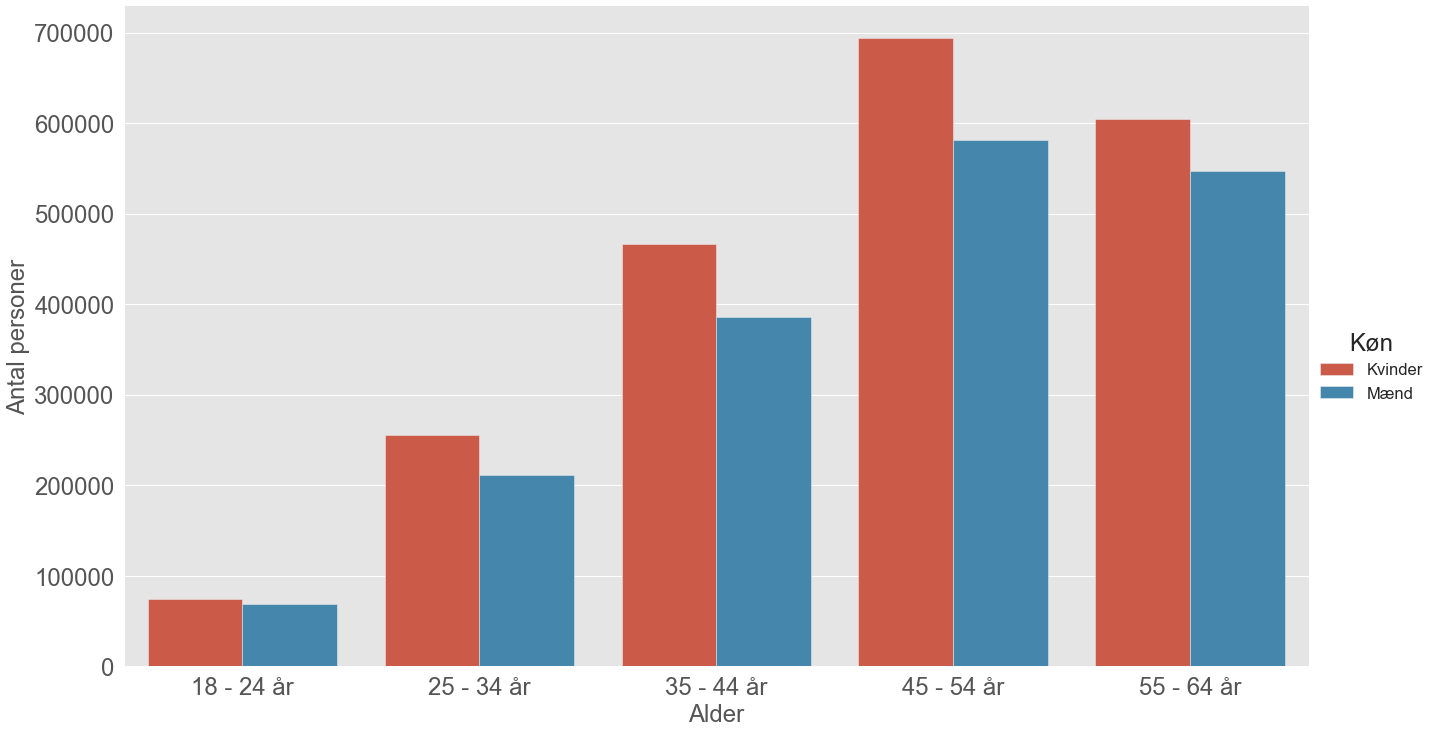

In [16]:
# Plot antallet af adspurgte personer
df_alder = df_koen_alder.groupby(['Group', 'Køn', 'Alder'])['Antpers'].agg(['sum','count']).sort_index(level=['Alder'])
df_alder['Køn'] = df_alder.index.get_level_values(1)
df_alder['Alder'] = df_alder.index.get_level_values(-1)

sns.set(font_scale=1.5)
axis_font = {'fontname':'Arial', 'size':'24'}
plt.style.use('ggplot')
ax = sns.catplot(x="Alder", y="sum", hue="Køn", kind="bar", data=df_alder,height=10, aspect=1.8)
plt.xlabel('Alder',**axis_font)
plt.ylabel('Antal personer',**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.setp(ax._legend.get_title(), fontsize=24)
plt.show()


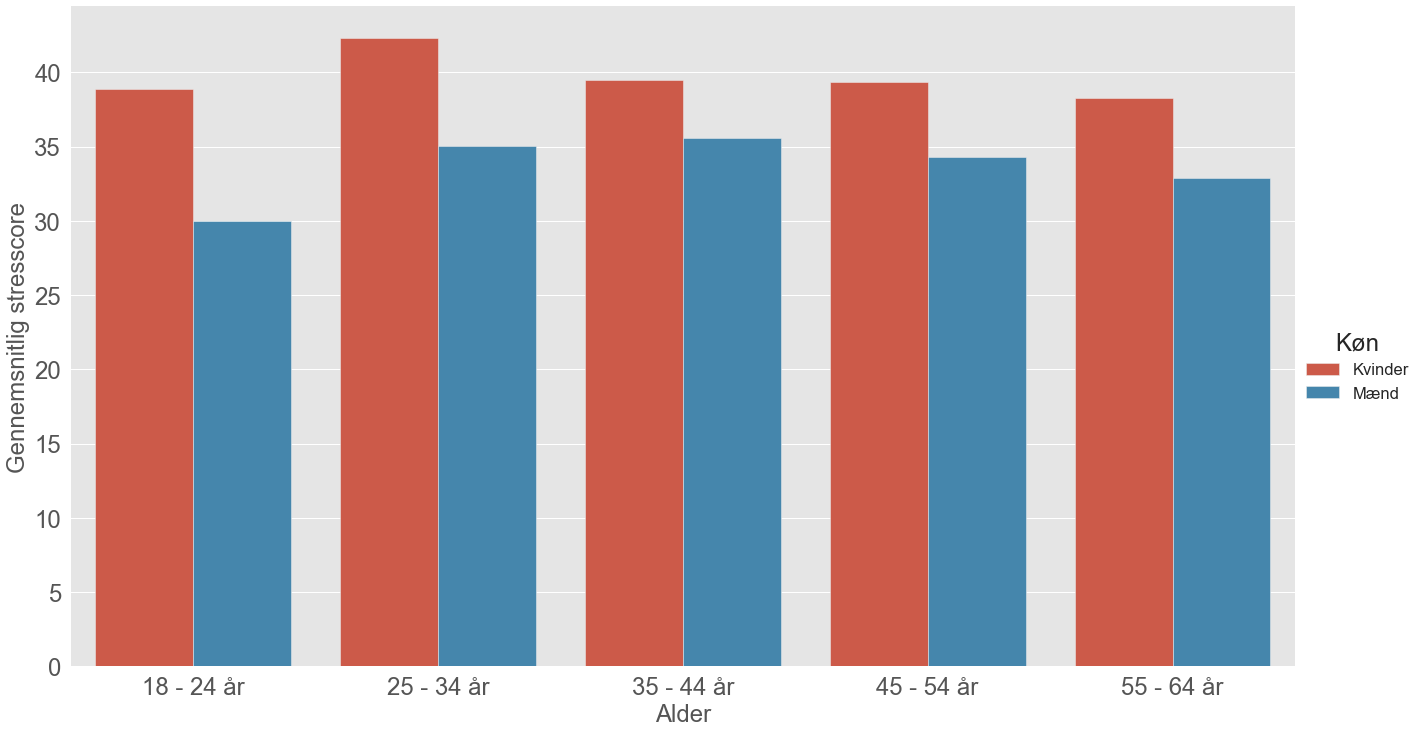

In [17]:
# Plot stresscore baseret på spørgsmål relateret til stress
df_stress = df_koen_alder[(df_koen_alder["Topic Label"]=="Uoverskuelighed og stress")]
df_stress= df_stress[df_stress['Ordforklaring'].notna()]

df_stress_score = df_stress.groupby(['Group', 'Køn', 'Alder'])['Score (Indekseret score)'].agg(['mean']).sort_index(level=['Alder'])
df_stress_score['Køn'] = df_stress_score.index.get_level_values(1)
df_stress_score['Alder'] = df_stress_score.index.get_level_values(-1)
df_stress_score


sns.set(font_scale=1.5)
axis_font = {'fontname':'Arial', 'size':'24'}
plt.style.use('ggplot')
ax = sns.catplot(x="Alder", y="mean", hue="Køn", kind="bar", data=df_stress_score,height=10, aspect=1.8)
plt.xlabel('Alder',**axis_font)
plt.ylabel('Gennemsnitlig stresscore',**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.setp(ax._legend.get_title(), fontsize=24)
plt.show()

## Spørgsmål 4: Er der nogle interessante forskelle på mænd og kvinder?

In [18]:
# Laver 2 df, en for mænd og en for kvinder
df_kvinder = df_koen_alder[(df_koen_alder["Group"].isin(["Kvinder"]))]
df_mænd = df_koen_alder[(df_koen_alder["Group"].isin(["Mænd"]))]

# Spørgsmålene bliver grupperet i deres kategori
df_kvinder=df_kvinder.groupby('Topic Label').mean()
df_mænd=df_mænd.groupby('Topic Label').mean()

# Kategori-scorene for kvinderne bliver trukket fra mændenes
df_mænd_vs_kvinder=pd.DataFrame(df_mænd["Score (Indekseret score)"] - df_kvinder["Score (Indekseret score)"])
t = df_mænd_vs_kvinder.sort_values(by='Score (Indekseret score)',ascending=False).reset_index().rename(columns={
    'Score (Indekseret score)': 'Indekseret score (Positiv mænd, negativ kvinder)'})

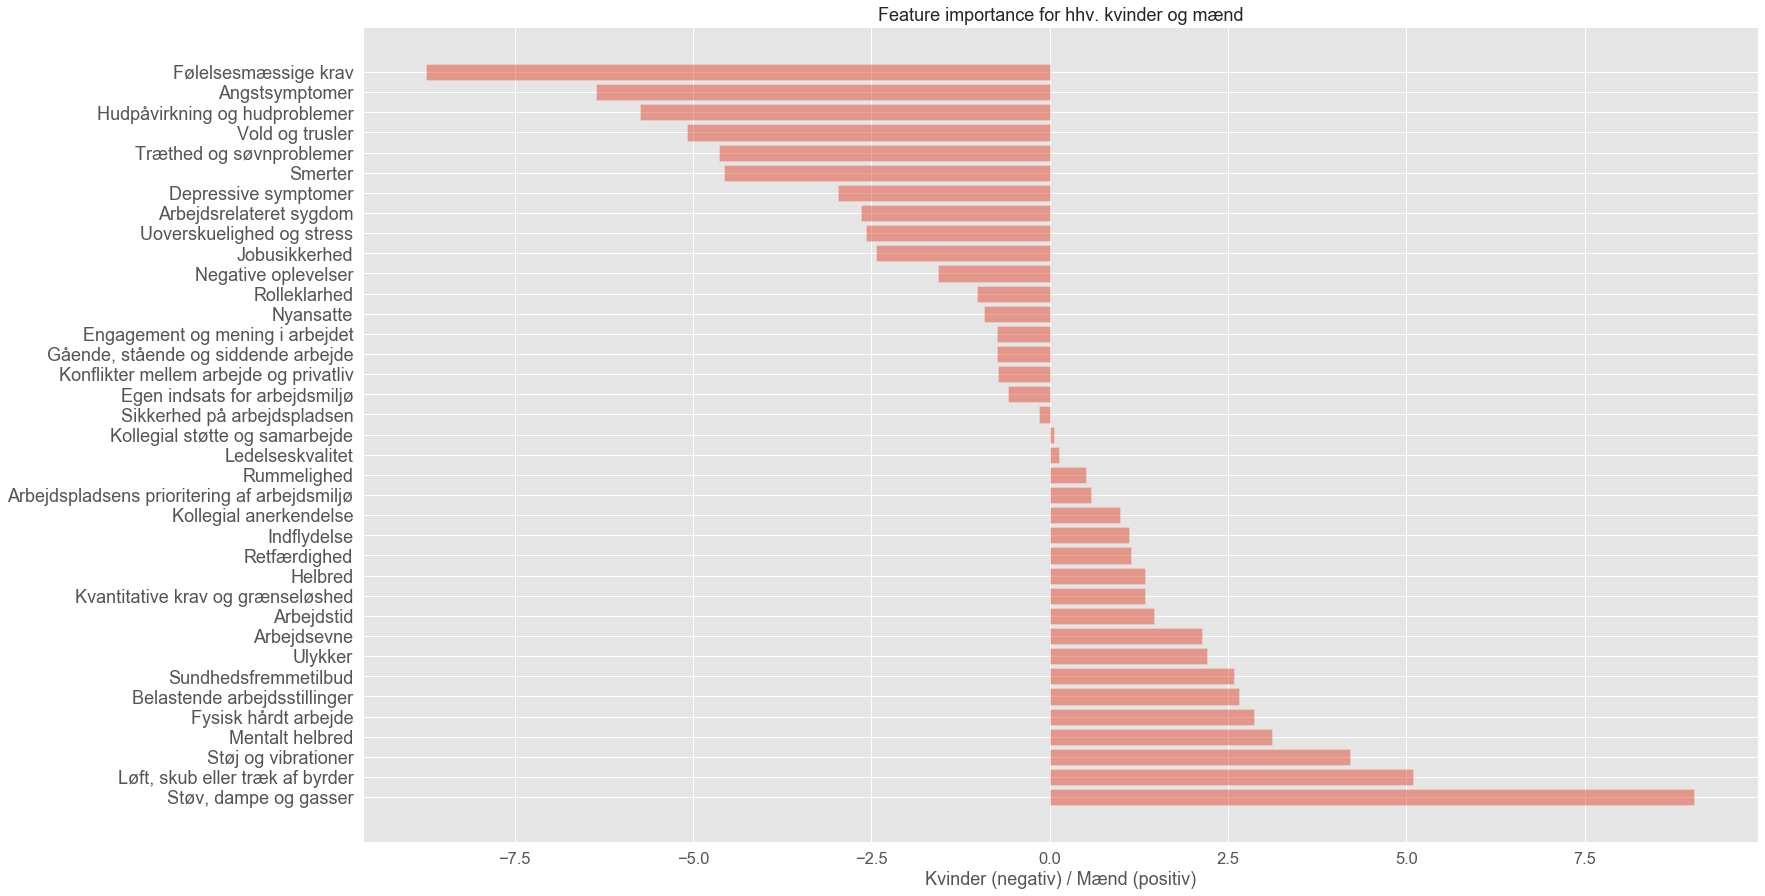

In [19]:
#Plotter forskellen:
axis_font = {'fontname':'Arial', 'size':'18'}
plt.figure(figsize=(25,15))
plt.barh(np.arange(len(t['Topic Label'])), t['Indekseret score (Positiv mænd, negativ kvinder)'], align='center', alpha=0.5)
plt.yticks(np.arange(len(t['Topic Label'])), t['Topic Label'], **axis_font)
plt.xlabel('Kvinder (negativ) / Mænd (positiv)', **axis_font)
plt.title('Feature importance for hhv. kvinder og mænd', **axis_font)
plt.show()

Vi kan se at mænd generelt er mere udfordret fysisk, mens kvinder mere psykisk. En intersant opdagelse er at "Ledelseskvalitet" næsten er lige mellem mand og kvinde. Dette er uventet og vil blive undersøgt nærmere.

Vi dykker nu ned i kategorien "Ledelseskvalitet" og ser hvilke spørgsmål, der blev stillet.

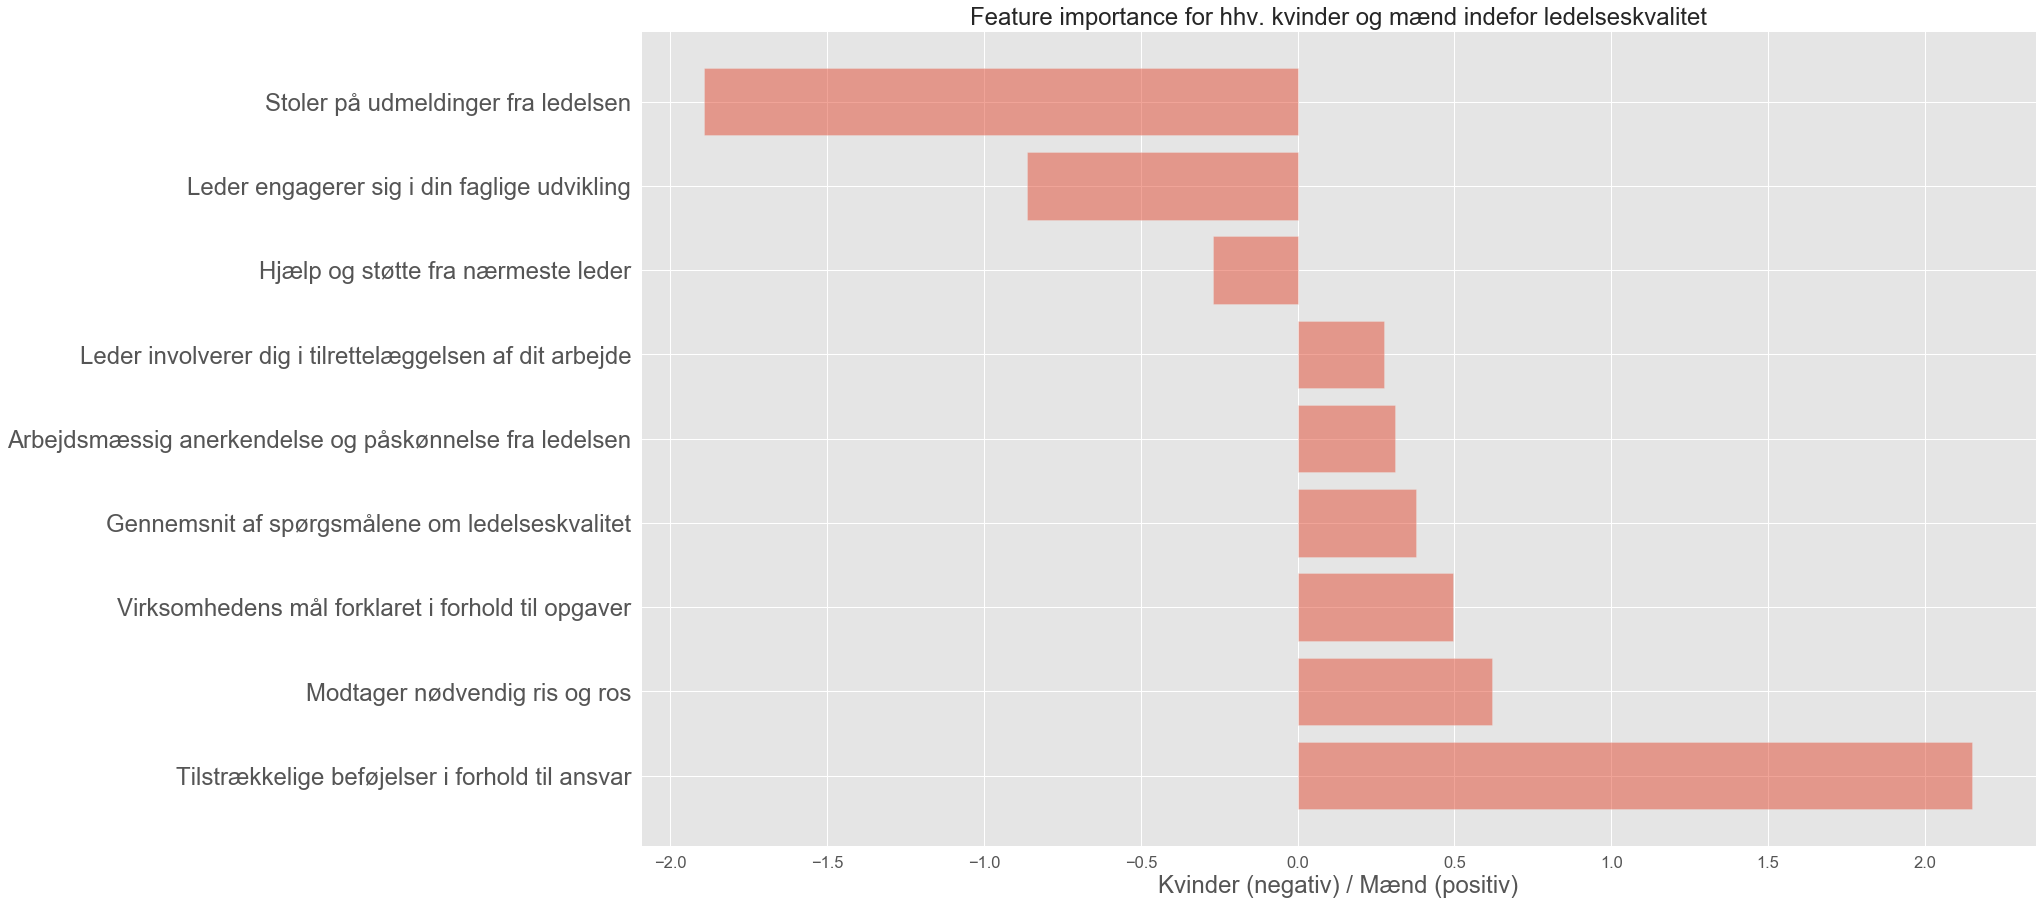

In [20]:
# Laver 2 df for mænd og kvinder vedr. ledelseskvalitet
df_kvinder_ledelse= df_koen_alder[(df_koen_alder["Group"].isin(["Kvinder"])&(df_koen_alder["Topic Label"]=="Ledelseskvalitet"))]
df_mænd_ledelse = df_koen_alder[(df_koen_alder["Group"].isin(["Mænd"])&(df_koen_alder["Topic Label"]=="Ledelseskvalitet"))]

# Gennemsnittet tages
df_kvinder_ledelse = df_kvinder_ledelse.groupby(["Question Label"]).mean()
df_mænd_ledelse = df_mænd_ledelse.groupby(["Question Label"]).mean()

# De forskellige scorer mellem kvinder og mænde bliver trukket fra hinanden.
df_mænd_vs_kvinder_ledelse=pd.DataFrame(df_mænd_ledelse["Score (Indekseret score)"] - df_kvinder_ledelse["Score (Indekseret score)"])

# Sorteres i df og overskriften ændres for "Indekseret score"
t=df_mænd_vs_kvinder_ledelse.sort_values(by='Score (Indekseret score)',ascending=False).reset_index().rename(columns={
    'Score (Indekseret score)': 'Indekseret score (Positiv mænd, negativ kvinder)'})

# Plotter forskellen i kategorien "Ledelseskvalitet":
plt.figure(figsize=(25,15))
axis_font = {'fontname':'Arial', 'size':'24'}
plt.barh(np.arange(len(t['Question Label'])), t['Indekseret score (Positiv mænd, negativ kvinder)'], align='center', alpha=0.5)
plt.yticks(np.arange(len(t['Question Label'])), t['Question Label'], **axis_font)
plt.xlabel('Kvinder (negativ) / Mænd (positiv)', **axis_font)
plt.title('Feature importance for hhv. kvinder og mænd indefor ledelseskvalitet', **axis_font)
plt.show()

Selvom mænd og kvinder overordnet vægter kategorien "ledelseskvaliteter" ens, er der stadig variation indenfor gruppen af spørgsmål hørende til ledelseskvalitet. 
